<a href="https://colab.research.google.com/github/Legendary-Nerd/MNIST-in-TensorFlow/blob/main/MNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Add,Concatenate,Flatten
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [ ]:
le = LabelBinarizer()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
input = Input(shape=(28, 28))
flat = Flatten()(input)
x1 = Dense(100, activation='relu')(flat)
x21 = Dense(100, activation='relu')(x1)
x22 = Dense(100, activation='relu')(x1)

add = Add()([x21, x22])
add2 = Add()([x21, x22])
can = Concatenate()([add, add2, x22])

output = Dense(10, activation='softmax')(can)
model = Model(input, output)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 100)       │     78,500 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 100)       │     10,100 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 100)       │     10,100 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 100)       │          0 │ dense_5[0][0],    │
│                     │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 100)       │          0 │ dense_5[0][0],    │
│                     │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 300)       │          0 │ add_2[0][0],      │
│ (Concatenate)       │                   │            │ add_3[0][0],      │
│                     │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 10)        │      3,010 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 101,710 (397.30 KB)

 Trainable params: 101,710 (397.30 KB)

 Non-trainable params: 0 (0.00 B)

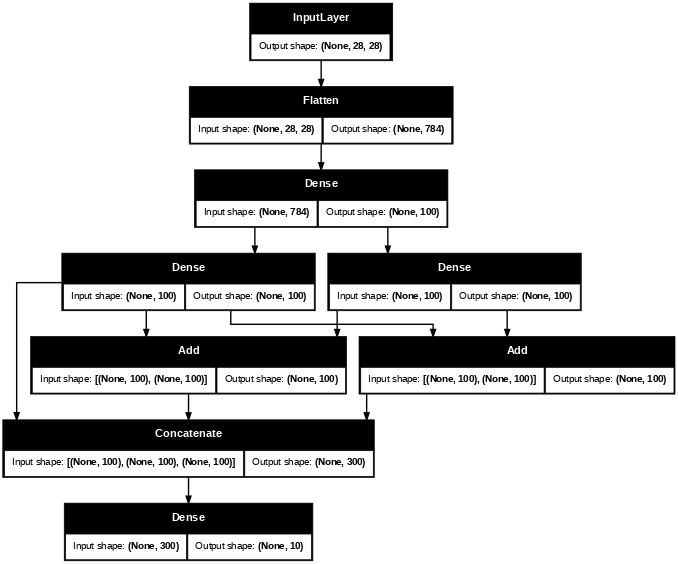

In [ ]:
model.compile(optimizer='sgd',loss="categorical_crossentropy",metrics=['accuracy'])

model.summary()

tf.keras.utils.plot_model(model,show_shapes=True, dpi=50)

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

# x_train.shape

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7504 - loss: 0.8784
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9267 - loss: 0.2517
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9410 - loss: 0.2040
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9525 - loss: 0.1644
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9574 - loss: 0.1462
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9631 - loss: 0.1279
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9664 - loss: 0.1144
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9727 - loss: 0.0972
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0922
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9759 - loss: 0.0824
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.0781
Epoch 12/50
1875/1875 ━━━━━━━

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0967


[0.08532397449016571, 0.9787999987602234]

In [ ]:
y_pred  = np.argmax(model(x_test), axis =-1)
print(y_pred)

y_true =  np.argmax(y_test, axis =-1)
print(y_true)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, y_pred)
print(cm)
cr = classification_report(y_true, y_pred)
print(cr)

[[ 969    0    1    1    1    2    1    3    2    0]
 [   0 1123    3    1    0    1    3    1    3    0]
 [   3    1 1007    2    4    0    1    5    8    1]
 [   0    0    6  981    0    6    1    4    5    7]
 [   1    0    3    0  963    1    2    2    2    8]
 [   4    0    0    8    1  865    4    2    7    1]
 [   4    3    1    1    6    6  935    0    2    0]
 [   2    1    6    1    2    0    0 1005    4    7]
 [   6    0    2    4    3    2    2    1  950    4]
 [   2    2    1    3    6    2    1    1    1  990]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98   

<Axes: >

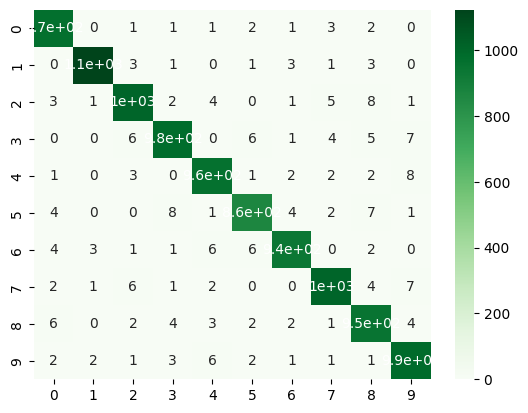

In [ ]:
import seaborn as sns
digits = [0,1,2,3,4,5,6,7,8,9]
sns.heatmap(cm,cmap='Greens', annot=True,xticklabels=digits,yticklabels=digits)

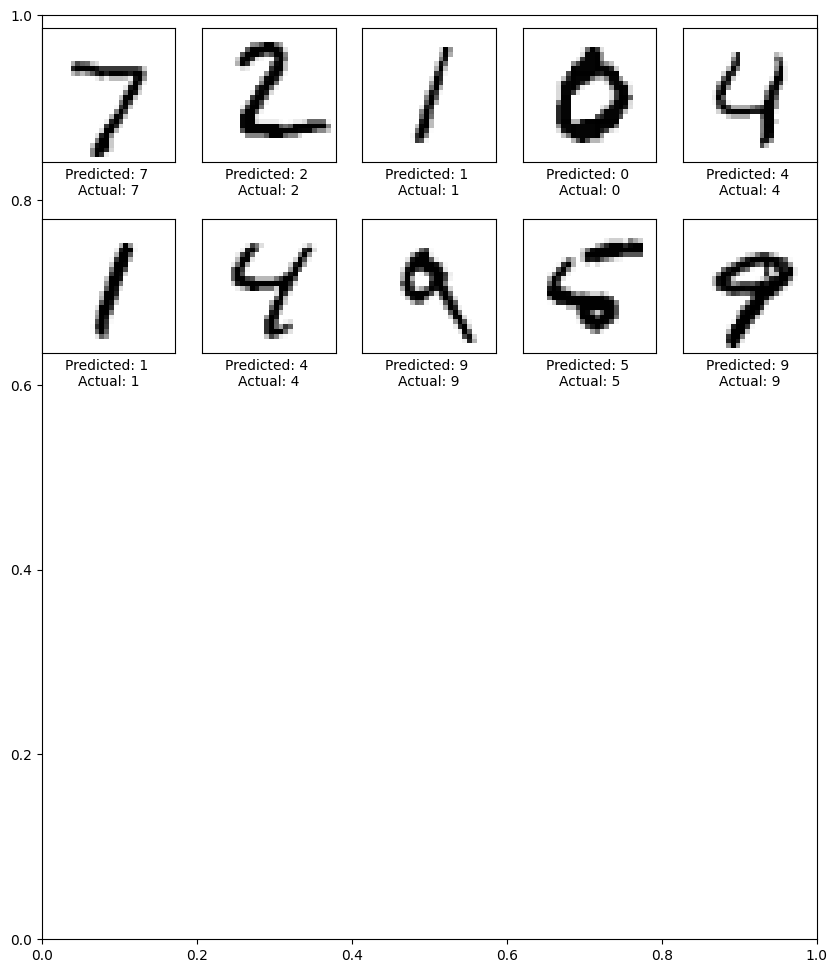

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot()
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(f"Predicted: {y_pred[i]} \nActual: {y_true[i]}")
    plt.imshow(x_test[i],cmap=plt.cm.binary)

plt.show()